## Ridge Regression

The following plot depicts the way in which the variance of the model parameters (beta[1], ..., beta[10]) decreases with the increase of the penalty term lambda.

In [2]:
import sklearn.datasets
import itertools
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mp

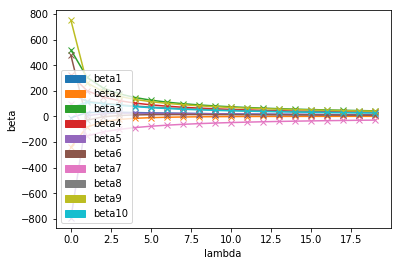

In [3]:
def beta_ridge(X, y, lambda_var):
    p = X.shape[1]
    return list(np.dot(np.dot(np.linalg.inv(np.dot(X.T, X) + lambda_var * np.identity(p)), X.T), y))


def plot_ridge():
    dataset = sklearn.datasets.load_diabetes()
    X = np.array(dataset['data'])
    y = np.array(dataset['target'])

    lambda_range = range(20)
    beta_points = []
    for lambda_var in lambda_range:
        beta_points.append(beta_ridge(X, y, lambda_var))

    handl = []
    for beta in range(X.shape[1]):
        column = [beta_points[i][beta] for i in lambda_range]
        plt.plot(list(lambda_range), column, marker='x', color='C'+str(beta % 10), linestyle='-')
        handl.append(mp.Patch(color='C'+str(beta % 10), label='beta'+str(beta+1)))

    plt.legend(handles=handl)
    plt.xlabel('lambda')
    plt.ylabel('beta')
    plt.show()

plot_ridge()